In [6]:
import numpy as np
from matplotlib import pyplot as plt

In [7]:
raw_data_X = [[3.393533211, 2.331273381],
              [3.110073483, 1.781539638],
              [1.343808831, 3.368360954],
              [3.582294042, 4.679179110],
              [2.280362439, 2.866990263],
              [7.423436942, 4.696522875],
              [5.745051997, 3.533989803],
              [9.172168622, 2.511101045],
              [7.792783481, 3.424088941],
              [7.939820817, 0.791637231]
             ]
raw_data_y = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]

In [8]:
X_train = np.array(raw_data_X)
y_train = np.array(raw_data_y)

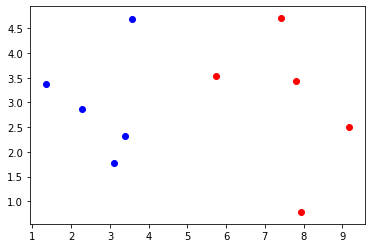

In [9]:
plt.scatter(x = X_train[y_train == 0,0],y = X_train[y_train == 0,1],color = "b")
plt.scatter(x = X_train[y_train == 1,0],y = X_train[y_train == 1,1],color = "r")
plt.show()

此时新增一个数据点，以当前数据的分布规则判断新数据点的分类

In [10]:
x = np.array([8.093607318, 3.365731514])

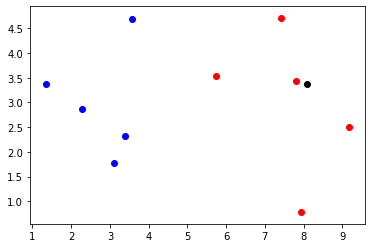

In [11]:
plt.scatter(x = X_train[y_train == 0,0],y = X_train[y_train == 0,1],color = "b")
plt.scatter(x = X_train[y_train == 1,0],y = X_train[y_train == 1,1],color = "r")
plt.scatter(x[0],x[1],color= "black")
plt.show()

## KNN算法实现

In [12]:
from math import sqrt
from collections import Counter
distances = []
# 计算新增点x到每个点之间的距离，并储存到一个列表中
for x_train in X_train:
    d = sqrt(np.sum((x_train - x)**2))
    distances.append(d)
    
# 对列表中的距离进行排序，选出距离最近的n个点
nearest = y_train[np.argsort(distances)]
topK_y = nearest[:4]
topK_y

array([1, 1, 1, 1])

In [13]:
c = Counter(topK_y) #返回一个字典

# 返回和新增点最接近的点的标签
c.most_common()[0][0]

1

In [14]:
distances

[4.812566907609877,
 5.229270827235305,
 6.749798999160064,
 4.6986266144110695,
 5.83460014556857,
 1.4900114024329525,
 2.354574897431513,
 1.3761132675144652,
 0.3064319992975,
 2.5786840957478887]

## 封装KNN算法

In [15]:
from math import sqrt
from collections import Counter
def KNNClassifier(x,X_train,y_train,k):
    # 使用列表存储各个点与新增点的距离
    dist = [np.sqrt(np.sum((x - x_train)**2)) for x_train in X_train]
    # 排序选出距离最近的k个点
    k_nearest = y_train[np.argsort(dist)[:k]]
    # 对距离最近的k个点的标签统计次数
    votes = Counter(k_nearest)
    # 返回属性个数最多的标签
    predict_y = votes.most_common(1)[0][0]
    return predict_y

In [16]:
KNNClassifier(x,X_train,y_train,3)

1

In [17]:
np.sqrt(4)

2.0

## 运行pycharm中封装的KNN算法

In [18]:
%run ./encapsulations/KNN.py

In [19]:
%cat ./encapsulations/KNN.py

import numpy as np
from math import sqrt
from collections import Counter

def KNN_classify(x,X_train,y_train,k):

    assert 1 <= k <= X_train.shape[0], "k must be valid"
    assert X_train.shape[0] == y_train.shape[0],"the size of X_train must equal to the size of y_train"
    assert X_train.shape[1] == x.shape[0],"the feature number of x must equal to X_train"

    distances = [sqrt(np.sum((x - x_train)**2)) for x_train in X_train]
    nearest = np.argsort(distances)[:k]
    topK_y = y_train[nearest]
    votes = Counter(topK_y).most_common()[0][0]
    return votes


In [20]:
KNN_classify(x,X_train,y_train,2)

1

## 使用Scikit-learn中的KNN算法

In [21]:
from sklearn.neighbors import KNeighborsClassifier

In [22]:
KNN_classifier = KNeighborsClassifier(n_neighbors=6)

In [28]:
KNN_classifier.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

In [30]:
KNN_classifier.predict(x.reshape(1,-1))  
#新版本的sklearn已经不支持直接传入一个数进行KNN预测了，需要传入一个数组，因此需要reshape

array([1])

## 重新整理我们的KNN算法

In [49]:
%cat ./encapsulations/KNN.py

import numpy as np
from math import sqrt
from collections import Counter

class KNNClassifier:

    def __init__(self,k):
        """初始化KNN分类器"""
        assert k >= 1,"k must be valid"
        self.k = k
        self._X_train = None
        self._y_train = None

    def fit(self,X_train,y_train):
        """根据训练集X_train和y_train训练KNN分类器"""
        assert X_train.shape[0] == y_train.shape[0], "the size of X_train must equal to the size of y_train"
        assert self.k <= X_train.shape[0], "the size of X_train must be at least k."

        self._X_train = X_train
        self._y_train = y_train
        return self

    def predict(self,X_predict):
        """给定待预测数据集X_predict,返回表示X_predict的结果向量"""
        assert self._X_train is not None and self._X_train is not None,\
            "must fit before predict"
        assert X_predict.shape[1] == self._X_train.shape[1],\
            "the feature number of X_predict must be equal to X_train"

        y_predict = [self._predict(x) for x in X_

In [50]:
%run ./encapsulations/KNN.py

In [51]:
knn_clf= KNNClassifier(k=6)

In [52]:
knn_clf.fit(X_train,y_train)

KNN(k=6)

In [53]:
knn_clf.predict(x.reshape(1,-1))

array([1])